# Visualize the distribution of nreads across samples

In [1]:
library(tidyverse) 
library(dplyr)
library(ggplot2)
library(ggpubr)

setwd("/home/strawberry/Documents/Collaborations/sinusite_edwin/data") # changing work directory to data 
metadata_full_clean <- read.delim("./metadata_full_clean.tsv", h=T) 
head(metadata_full_clean)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,ID_Sample,SNOT22,SNOT22nasal,LK_Total,LK_Secret,ClinicCtrl,AntUse,Cortuse,Patient,Filename,⋯,Timepoint,Sex,Age,Atopic_Symptoms,Asthma,NSAID_Intolerance,Total_IgE,Blood_Eosinophilia,Tissue_Eosinophilia,Final_LundMackay
,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,0001967K_T1,38,12,4,2,NC,1,1,0001967K,0001967K_T1.fastq,⋯,T1,1,58.7,1,1,0,38,100,10,15
2,0001967K_T3,96,26,10,4,NC,1,0,0001967K,0001967K_T3.fastq,⋯,T3,1,58.7,1,1,0,38,100,10,15
3,0001967K_T6,79,19,6,4,NC,1,1,0001967K,0001967K_T6.fastq,⋯,T6,1,58.7,1,1,0,38,100,10,15
4,0088303G_T0,102,37,8,2,NC,NA,0,0088303G,0088303G_T0.fastq,⋯,T0,2,60.3,1,1,0,667,800,58,22
5,0088303G_T1,32,7,4,1,NC,1,0,0088303G,0088303G_T1.fastq,⋯,T1,2,60.3,1,1,0,667,800,58,22
6,0088303G_T3,NA,NA,NA,NA,NA,0,0,0088303G,0088303G_T3.fastq,⋯,T3,2,60.3,1,1,0,667,800,58,22


## nreads absolute value

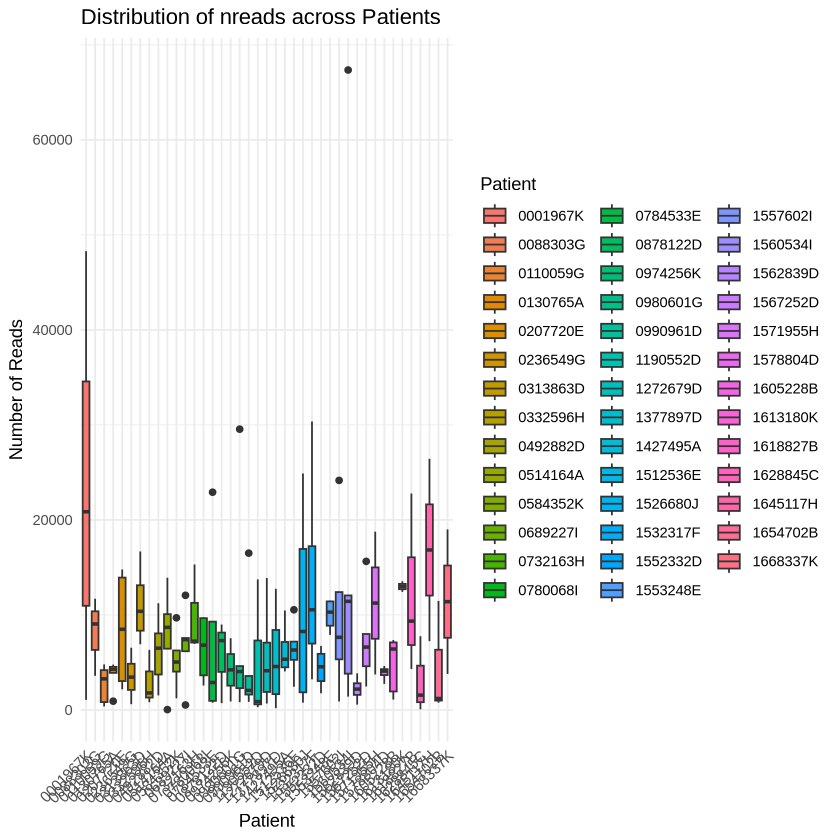

In [2]:
### Boxplot of nreads grouped by Patient
p1 <- ggplot(metadata_full_clean, aes(x = Patient, y = nreads)) +
  geom_boxplot(aes(fill = Patient)) +
  theme_minimal() +
  labs(title = "Distribution of nreads across Patients",
       x = "Patient",
       y = "Number of Reads") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
p1

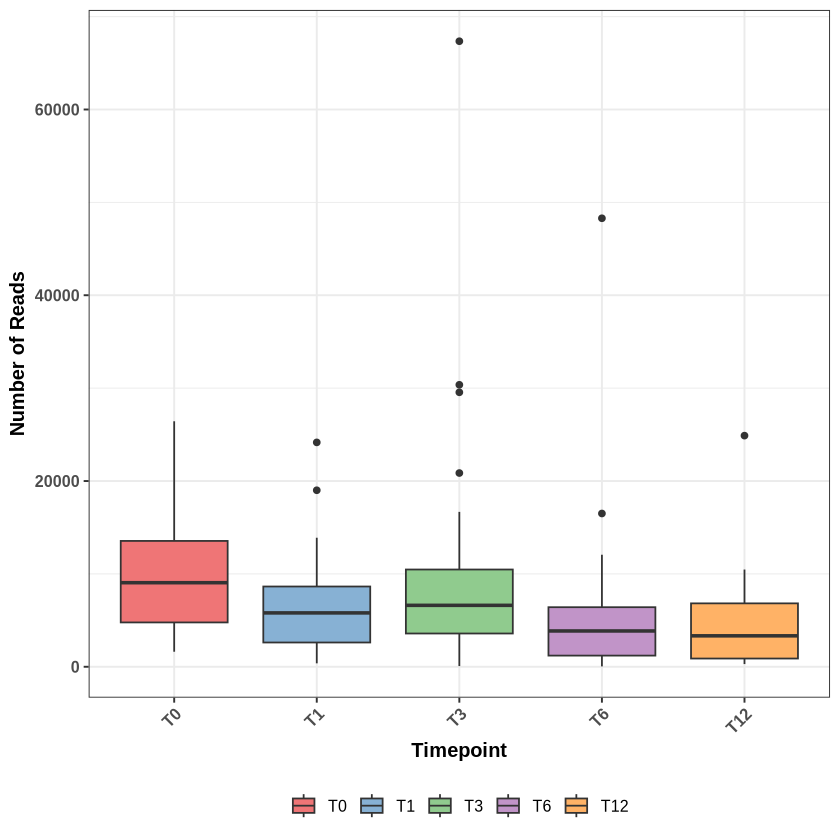

In [5]:
### Boxplot of nreads grouped by Timepoint
#### assign levels to timepoint for ordering
metadata_full_clean$Timepoint <- factor(
  metadata_full_clean$Timepoint,
  levels = c("T0", "T1", "T3", "T6", "T12")
)

#### specify color for timepoints to standardize across figures
timepoint_colors <- c(
  "T0" = "#ef7576",
  "T1" = "#87b1d4",
  "T3" = "#90cb8e",
  "T6" = "#c194c8",
  "T12" = "#ffb266"
)

p2 <- ggplot(metadata_full_clean, aes(x = Timepoint, y = nreads)) +
  geom_boxplot(aes(fill = Timepoint)) +
  scale_fill_manual(values = timepoint_colors) +  # apply custom colors
  theme_bw(base_size = 12) +
  labs(
    # title = "Distribution of nreads across Timepoints",
    x = "Timepoint",
    y = "Number of Reads"
  ) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"),  # bold timepoints
    legend.position = "bottom",  # move legend
    legend.title = element_blank(),  # optional: remove legend title
    axis.text.y = element_text(face = "bold"),  # make y-axis ticks bold too (optional)
    axis.title = element_text(face = "bold"),   # bold axis titles
    plot.title = element_text(face = "bold", hjust = 0.5)  # center and bold title
  )
p2

## nreads log-transformed value

In [7]:
### Add a log-transformed column
metadata_full_clean$log_nreads <- log10(metadata_full_clean$nreads + 1)
head(metadata_full_clean)

,ID_Sample,SNOT22,SNOT22nasal,LK_Total,LK_Secret,ClinicCtrl,AntUse,Cortuse,Patient,Filename,⋯,Sex,Age,Atopic_Symptoms,Asthma,NSAID_Intolerance,Total_IgE,Blood_Eosinophilia,Tissue_Eosinophilia,Final_LundMackay,log_nreads
,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,0001967K_T1,38,12,4,2,NC,1,1,0001967K,0001967K_T1.fastq,⋯,1,58.7,1,1,0,38,100,10,15,3.026125
2,0001967K_T3,96,26,10,4,NC,1,0,0001967K,0001967K_T3.fastq,⋯,1,58.7,1,1,0,38,100,10,15,4.319335
3,0001967K_T6,79,19,6,4,NC,1,1,0001967K,0001967K_T6.fastq,⋯,1,58.7,1,1,0,38,100,10,15,4.683866
4,0088303G_T0,102,37,8,2,NC,NA,0,0088303G,0088303G_T0.fastq,⋯,2,60.3,1,1,0,667,800,58,22,3.956745
5,0088303G_T1,32,7,4,1,NC,1,0,0088303G,0088303G_T1.fastq,⋯,2,60.3,1,1,0,667,800,58,22,4.068483
6,0088303G_T3,NA,NA,NA,NA,NA,0,0,0088303G,0088303G_T3.fastq,⋯,2,60.3,1,1,0,667,800,58,22,3.554852


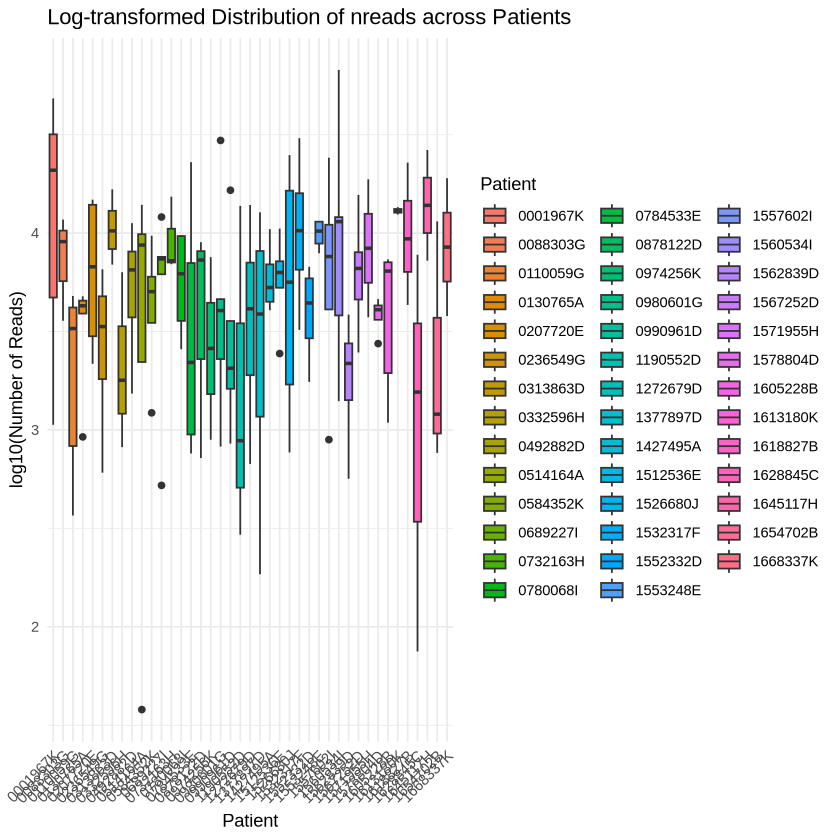

In [6]:
### Boxplot of log-transformed nreads grouped by Patient
p3 <- ggplot(metadata_full_clean, aes(x = Patient, y = log_nreads)) +
  geom_boxplot(aes(fill = Patient)) +
  theme_minimal() +
  labs(title = "Log-transformed Distribution of nreads across Patients",
       x = "Patient",
       y = "log10(Number of Reads)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
p3

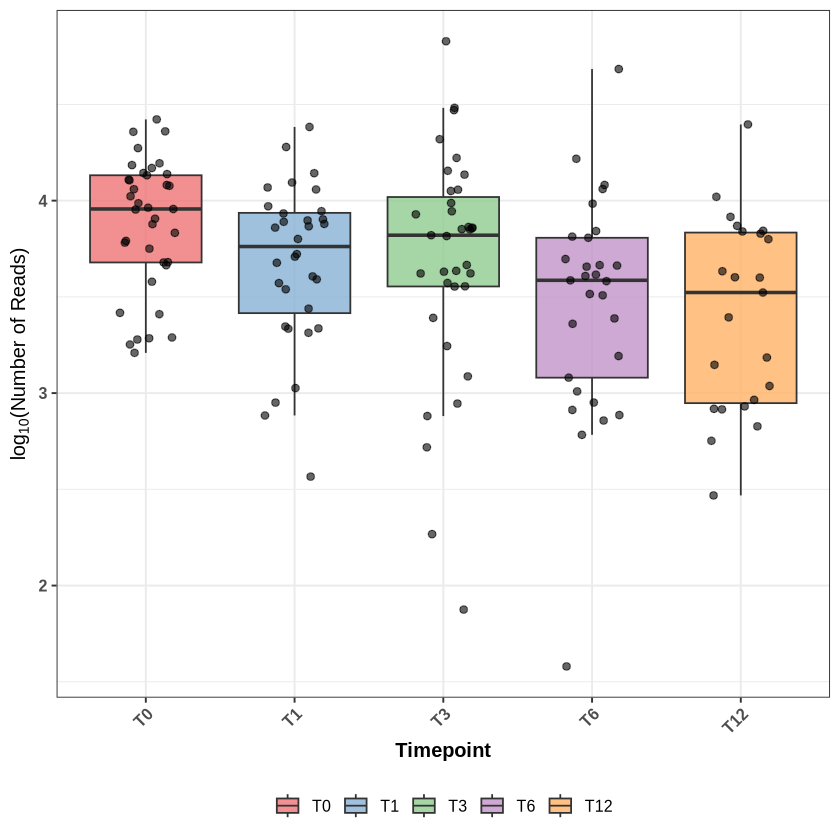

In [14]:
### Boxplot of log-transformed nreads grouped by Timepoint
p4 <- ggplot(metadata_full_clean, aes(x = Timepoint, y = log_nreads)) +
  geom_boxplot(aes(fill = Timepoint), outlier.shape = NA, alpha = 0.8) +  # suppress default outliers
  geom_jitter(width = 0.2, size = 1.8, alpha = 0.6, color = "black") +    # add jittered points
  scale_fill_manual(values = timepoint_colors) +
  theme_bw(base_size = 12) +
  labs(
    # title = "Log-transformed Distribution of nreads across Timepoints",
    x = "Timepoint",
    y = expression(log[10]*"(Number of Reads)")
  ) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"),
    axis.text.y = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    plot.title = element_text(face = "bold", hjust = 0.5),
    legend.position = "bottom",
    legend.title = element_blank()
  )

p4

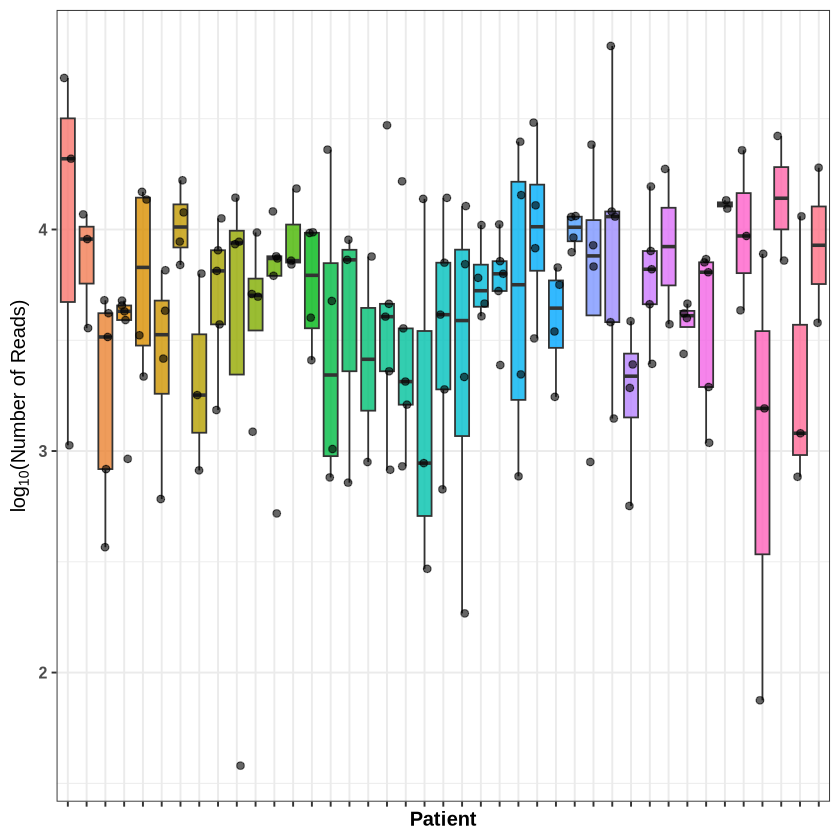

In [15]:
### Boxplot of log-transformed nreads grouped by Timepoint
p5 <- ggplot(metadata_full_clean, aes(x = Patient, y = log_nreads)) +
  geom_boxplot(aes(fill = Patient), outlier.shape = NA, alpha = 0.8) +  # suppress default outliers
  geom_jitter(width = 0.2, size = 1.8, alpha = 0.6, color = "black") +  # add jittered points
  theme_bw(base_size = 12) +
  labs(
    # title = "Log-transformed Distribution of nreads across Patients",
    x = "Patient",
    y = expression(log[10]*"(Number of Reads)")
  ) +
  theme(
    axis.text.x = element_blank(),  # <- corrected here
    axis.text.y = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    plot.title = element_text(face = "bold", hjust = 0.5),
    legend.position = "none",
    legend.title = element_blank()
  )

p5

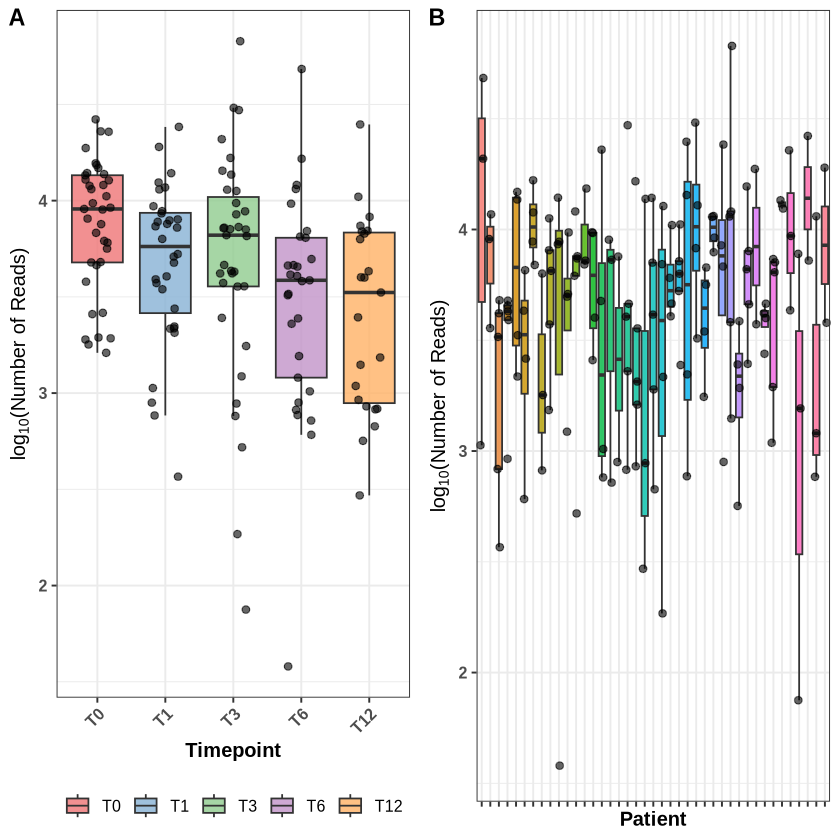

In [16]:
# Combine into one figure
combined_readdistrib_plot <- ggarrange(
  p4,
  p5,
  labels = c("A", "B"),
  ncol = 2, nrow = 1,
  common.legend = FALSE
)

combined_readdistrib_plot

In [17]:
ggsave("combined_readdistrib_plot.png", combined_readdistrib_plot, width = 8, height = 6, dpi = 300)